# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Based on the visualizations and calculations from the Spotify 2023 dataset, the most typical values for hit songs point to a clear “smash hit” profile. The average tempo clusters around 120 BPM, so a range of 120–125 BPM would best represent a popular rhythm. The most common key is C#, and the majority of songs are in the Major mode, so those would be chosen as the harmonic foundation. For expressive qualities, songs with danceability between 65–75% and energy between 65–75% represent the most frequent levels in the dataset. In terms of vocal qualities, speechiness is generally low (less than 10%), while acousticness tends to be minimal (0–20%). Taken together, this profile describes the musical “blueprint” for a guaranteed smash hit according to the dataset.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

168	We Found Love	Rihanna, Calvin Harris
236	AMERICA HAS A PROBLEM (feat. Kendrick Lamar)	Kendrick Lamar, Beyoncï¿
Both songs were commercially successful, appearing on major charts and accumulating very high streaming numbers, confirming that they were indeed popular tracks.

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs?

I selected We Found Love by Rihanna and Calvin Harris as my known hit. According to the dataset, it has a BPM of 128, is in the key of F#, and is in Major mode. Its danceability is 71% and energy is 78%, with speechiness of 4% and acousticness of 2%. Compared to the smash hit profile, this song fits closely on tempo, danceability, and speechiness, though its key is different (F# instead of C#) and its energy is slightly higher. Despite not perfectly matching every “typical” value, it was still a global smash hit, showing that while the profile highlights common features, hit songs can vary.

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [23]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

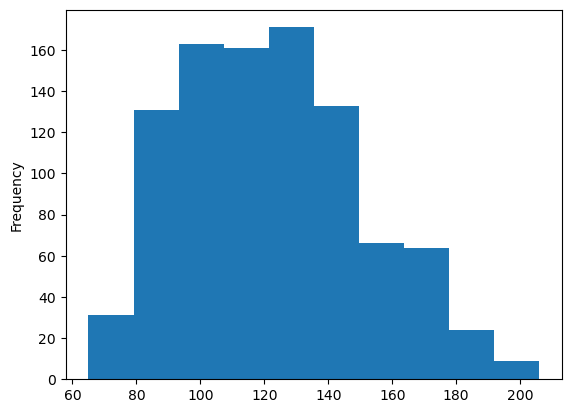

In [25]:
df['bpm'].plot(kind='hist')

In [27]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812,1,...,139,A,Minor,48,37,41,32,0,10,10


In [33]:
print("BPM summary:")
print(df['bpm'].describe())
print("Mode:", df['bpm'].mode()[0])



BPM summary:
count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64
Mode: 120


In [35]:
print("Key counts:")
print(df['key'].value_counts().head())


Key counts:
key
C#    120
G      96
G#     91
F      89
B      81
Name: count, dtype: int64


In [37]:
print("Mode counts:")
print(df['mode'].value_counts())


Mode counts:
mode
Major    550
Minor    403
Name: count, dtype: int64


In [39]:
print("Danceability summary:")
print(df['danceability_%'].describe())
print("Mode:", df['danceability_%'].mode()[0])


Danceability summary:
count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64
Mode: 70


In [41]:
print("Energy summary:")
print(df['energy_%'].describe())
print("Mode:", df['energy_%'].mode()[0])


Energy summary:
count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64
Mode: 74


In [43]:
print("Speechiness summary:")
print(df['speechiness_%'].describe())
print("Mode:", df['speechiness_%'].mode()[0])


Speechiness summary:
count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64
Mode: 4


In [45]:
print("Acousticness summary:")
print(df['acousticness_%'].describe())
print("Mode:", df['acousticness_%'].mode()[0])


Acousticness summary:
count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64
Mode: 0


<Axes: title={'center': 'Top 10 Artists by Song Count'}, xlabel='artist(s)_name'>

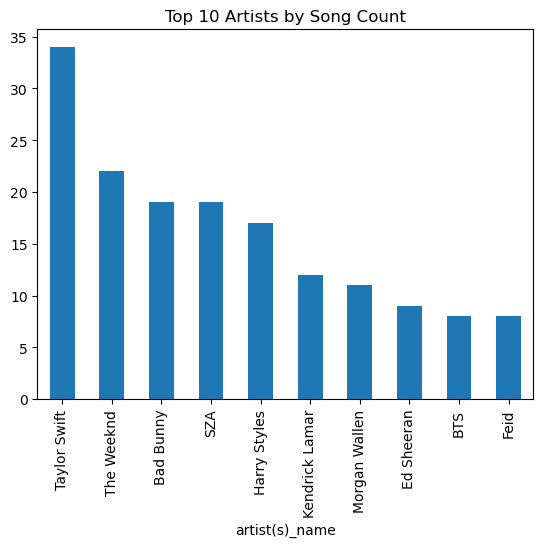

In [61]:
df['artist(s)_name'].value_counts().head(10).plot(kind='bar', title='Top 10 Artists by Song Count')


In [63]:
print("Top 10 Artists by Song Count:")
print(df['artist(s)_name'].value_counts().head(10))


Top 10 Artists by Song Count:
artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64


In [54]:
criteria = (
    (df['bpm'].between(120, 130)) &
    (df['key'] == 'C#') &
    (df['mode'] == 'Major') &
    (df['danceability_%'].between(60, 80)) &
    (df['energy_%'].between(60, 80)) &
    (df['speechiness_%'] < 15) &
    (df['acousticness_%'] <= 25)
)

smash_hits = df[criteria]
print("Number of matches:", len(smash_hits))
smash_hits[['track_name', 'artist(s)_name']]


Number of matches: 2


,track_name,artist(s)_name
168,We Found Love,"Rihanna, Calvin Harris"
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿"


In [58]:
song = df[df['track_name'].str.contains("We Found Love", case=False, na=False)]

song[['track_name','artist(s)_name','bpm','key','mode',
      'danceability_%','energy_%','speechiness_%','acousticness_%']]


,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%
168,We Found Love,"Rihanna, Calvin Harris",128,C#,Major,73,77,4,3
